#  Milestone 2:

---

##  **Week 3: Feature Engineering and Selection**

### **1️. Load and Preprocess Dataset**
1.1 Load the cleaned dataset saved from Milestone 1  
1.2 Separate features (`X`) and target (`y`)  
1.3 Encode categorical variables using **Label Encoding**  
1.4 Scale numerical features using **StandardScaler** (important for PCA)

### **2️. Dimensionality Reduction Using PCA**
2.1 Apply **PCA** to scaled numeric features  
2.2 Decide the number of components

2.3 Visualize the first two principal components to observe separation between normal and attack traffic  
2.4 Optionally, save PCA-transformed features for further modeling

### **3. Feature Importance with Random Forest**
3.1 Train a **Random Forest Classifier** on original or PCA-transformed features  
3.2 Extract **feature importance scores** from the trained model  
3.3 Rank features based on importance to select top features for modeling

### **4️. Correlation / Redundancy Analysis**
4.1 Compute correlation matrix for numeric features  
4.2 Compare with PCA components to decide which features to retain  
4.3 Use top RF features for further training or refinement



##  **Week 4: Random Forest Model Training**

### **1️. Train/Test Split**
1.1 Split the dataset into **training and testing sets** ( from Milestone 1)  
1.2 Stratify the split to maintain class distribution

### **2️. Model Training**
2.1 Train a **Random Forest Classifier** with `n_estimators=50` and `n_jobs=-1`  
2.2 Fit the model on the training data

### **3️. Model Evaluation**
3.1 Predict on the test set  
3.2 Compute **accuracy, precision, recall, F1-score**  
3.3 Generate a **classification report** for each class

### **4️. Feature Importance Visualization**
4.1 Plot **top features** from RF as a horizontal bar chart  
4.2 Select top features
4.3 Visualize top features


### **5️.  Feature Selection Refinement**
5.1 Select top RF features or PCA components to retrain the model  
5.2 Refine model based on performance metrics if needed



-----


# Week 3: Feature Engineering and Selection
### **1.1 Load the cleaned dataset**
- Load the dataset saved from Milestone 1 from Google Drive.

- `drive.mount()` is used to connect Google Drive to Colab so we can access files directly.
- `pd.read_csv()` loads the dataset into a DataFrame for further processing.
- `df.shape` and `df.head()` help verify the dataset size and preview first rows.



In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')


file_path = '/content/drive/MyDrive/cleaned_dataset.csv'
df = pd.read_csv(file_path)

print("Shape of dataset:", df.shape)
df.head()


Mounted at /content/drive
Shape of dataset: (50000, 75)


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,-0.023113,-0.061835,0.358900,0.053584,-0.381513,-0.621631,-0.977331,-0.556451,-0.019578,-0.018704,...,-0.876614,-0.18957,-0.17638,-0.223443,-0.114804,-0.39652,-0.149414,-0.409062,-0.375626,BENIGN
1,1.070106,-0.044669,0.358625,-0.357135,-0.361867,-0.621631,-0.977331,-0.557399,-0.015968,-0.017607,...,0.971924,-0.18957,-0.17638,-0.223443,-0.114804,-0.39652,-0.149414,-0.409062,-0.375626,BENIGN
2,1.079057,-0.044669,0.205501,-0.357135,-0.381004,-0.621631,-0.977331,-0.557383,-0.016329,-0.017332,...,0.971924,-0.18957,-0.17638,-0.223443,-0.114804,-0.39652,-0.149414,-0.409062,-0.375626,BENIGN
3,1.070248,-0.044669,0.358671,-0.357135,-0.361867,-0.621631,-0.977331,-0.557030,-0.013802,-0.015687,...,0.971924,-0.18957,-0.17638,-0.223443,-0.114804,-0.39652,-0.149414,-0.409062,-0.375626,BENIGN
4,1.079199,-0.044669,0.205593,-0.357135,-0.381004,-0.621631,-0.977331,-0.557383,-0.016690,-0.017332,...,0.971924,-0.18957,-0.17638,-0.223443,-0.114804,-0.39652,-0.149414,-0.409062,-0.375626,BENIGN


### **1.2 Separate features (X) and target (y)**
- `df.drop(columns=[target_col])` selects all columns except the target as features (`X`).  
- `df[target_col]` selects the target column (`y`) we want to predict.  
- `X.shape` and `y.shape` confirm the dimensions of features and target.


In [2]:
# target column
target_col = ' Label'

X = df.drop(columns=[target_col])
y = df[target_col]

print("Feature set shape:", X.shape)
print("Target shape:", y.shape)


Feature set shape: (50000, 74)
Target shape: (50000,)


### **1.3 Encode categorical variables**
- Identify categorical columns in features.
- Use **Label Encoding** to convert them into numeric values.
- `X.select_dtypes(include='object')` identifies all categorical columns.  
- `LabelEncoder()` converts each categorical column into numeric values so models like Random Forest can process them.  



In [52]:
from sklearn.preprocessing import LabelEncoder

#  categorical columns
cat_cols = [c for c in X.select_dtypes(include='object').columns]

# Encode
for c in cat_cols:
    X[c] = LabelEncoder().fit_transform(X[c].astype(str))

print("Encoded columns:", cat_cols)


Encoded columns: []


### **1.4 Scale numerical features**
- Use **StandardScaler** to scale numeric features.

- `StandardScaler()` standardizes numeric columns to have mean 0 and standard deviation 1.  

- All numeric columns in `X` are transformed using `fit_transform()`.


In [27]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns
numeric_cols = X.select_dtypes(include='number').columns

scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])



## **2️. Dimensionality Reduction Using PCA**
### **2.1 Apply PCA to scaled numeric features**
- Use **PCA (Principal Component Analysis)** on scaled numeric features.
- PCA reduces dimensionality while preserving variance.
- `PCA()` reduces dimensionality by creating new components that capture the maximum variance.  
- `fit_transform()` applies PCA to the scaled feature set `X`, producing `X_pca`.



In [28]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()
X_pca = pca.fit_transform(X)

print(" PCA applied ")


 PCA applied 


### **2.2 Decide number of components**
- Check cumulative explained variance to retain ~95% of variance.
- Choose a smaller number of components for visualization or further modeling.
- `np.cumsum(pca.explained_variance_ratio_)` calculates cumulative variance explained by components.
- `np.argmax(... >= 0.95) + 1` gives the number of components to retain for modeling.


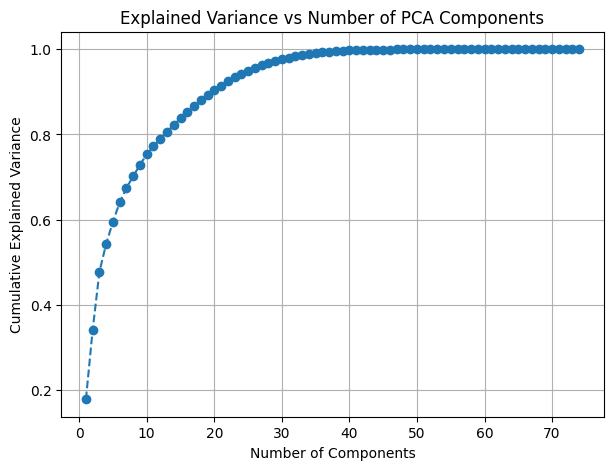

 Number of components to retain ~95% variance: 26


In [29]:
import numpy as np
import matplotlib.pyplot as plt

#  variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(7,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of PCA Components")
plt.grid(True)
plt.show()

n_components = np.argmax(explained_variance >= 0.95) + 1
print(f" Number of components to retain ~95% variance: {n_components}")


### **2.3 Visualize the first two principal components**
- Plot the first two PCA components to see separation between normal and attack traffic.
- `LabelEncoder()` converts the target `y` into numeric values for coloring the scatter plot.  
- `PCA(n_components=2)` reduces features to 2D for visualization.


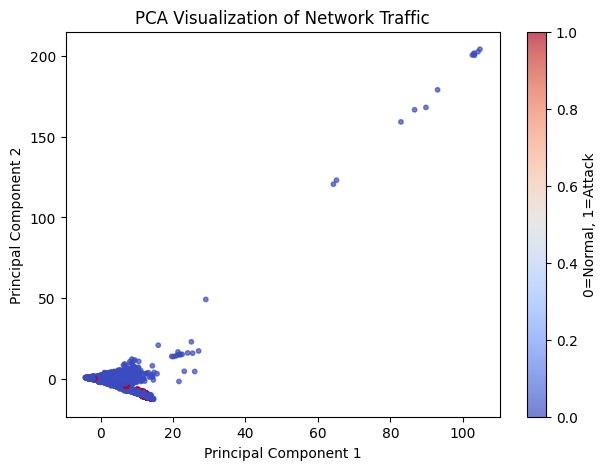

In [30]:
from sklearn.preprocessing import LabelEncoder

y_numeric = LabelEncoder().fit_transform(y)

# Apply PCA
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

plt.figure(figsize=(7,5))
plt.scatter(X_pca_2d[:,0], X_pca_2d[:,1], c=y_numeric, cmap='coolwarm', s=10, alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Network Traffic")
plt.colorbar(label='0=Normal, 1=Attack')
plt.show()


### **2.4 Save PCA-transformed features**
- Save the PCA-transformed dataset for further modeling.
- Convert PCA-transformed array into a DataFrame with columns `PC1`, `PC2`, and the target `Label`.  


In [31]:

X_pca_df = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
X_pca_df['Label'] = y.values

pca_file_path = '/content/drive/MyDrive/X_pca_2d_wednesday.csv'
X_pca_df.to_csv(pca_file_path, index=False)
print(f" PCA-transformed dataset saved to {pca_file_path}")


 PCA-transformed dataset saved to /content/drive/MyDrive/X_pca_2d_wednesday.csv


### **3.1 Load Train/Test Data**
- Load the preprocessed training and testing datasets saved from Milestone 1.
- These datasets include `X_train`, `X_test`, `y_train`, and `y_test`.


In [32]:
import pandas as pd

# Load saved train/test data from Milestone 1
X_train = pd.read_csv('/content/drive/MyDrive/X_train_wednesday.csv')
X_test = pd.read_csv('/content/drive/MyDrive/X_test_wednesday.csv')
y_train = pd.read_csv('/content/drive/MyDrive/y_train_wednesday.csv')
y_test = pd.read_csv('/content/drive/MyDrive/y_test_wednesday.csv')

# Convert y_train/y_test to 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print(" Train/Test datasets loaded")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


 Train/Test datasets loaded
X_train shape: (35000, 74)
X_test shape: (15000, 74)


### **3.2 Train Random Forest Classifier**
- Initialize the Random Forest Classifier with `n_estimators=50`.
- Fit the model on the training set (`X_train`, `y_train`).
- `n_jobs=-1` uses all CPU cores for faster training.


In [33]:
from sklearn.ensemble import RandomForestClassifier

#  train Random Forest
rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

print(" Random Forest model trained")


 Random Forest model trained


### **3.3 Extract Feature Importance**
- Retrieve feature importance scores from the trained Random Forest model.
- `rf.feature_importances_` gives the importance score for each feature learned by the Random Forest.  
- Convert it to a `pandas.Series` with feature names and select the top 10 using `nlargest(10)` for analysis.


In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract feature importance
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
top10 = importances.nlargest(10)

print(" Top 10 important features:\n", top10)



 Top 10 important features:
  Source IP                      0.145919
Flow ID                         0.134274
 Timestamp                      0.041592
 Destination Port               0.037478
 Bwd IAT Max                    0.035750
 Flow IAT Min                   0.034425
 Source Port                    0.031570
 min_seg_size_forward           0.030345
 Total Length of Bwd Packets    0.026289
 Destination IP                 0.025430
dtype: float64


### **4.1 Compute Correlation Matrix**
- Calculate pairwise correlations between numeric features.
- Visualize using a heatmap to spot strong correlations (>0.8 or <-0.8).
- `X_train.corr()` computes pairwise correlation between numeric features.  
- `sns.heatmap()` visualizes these correlation


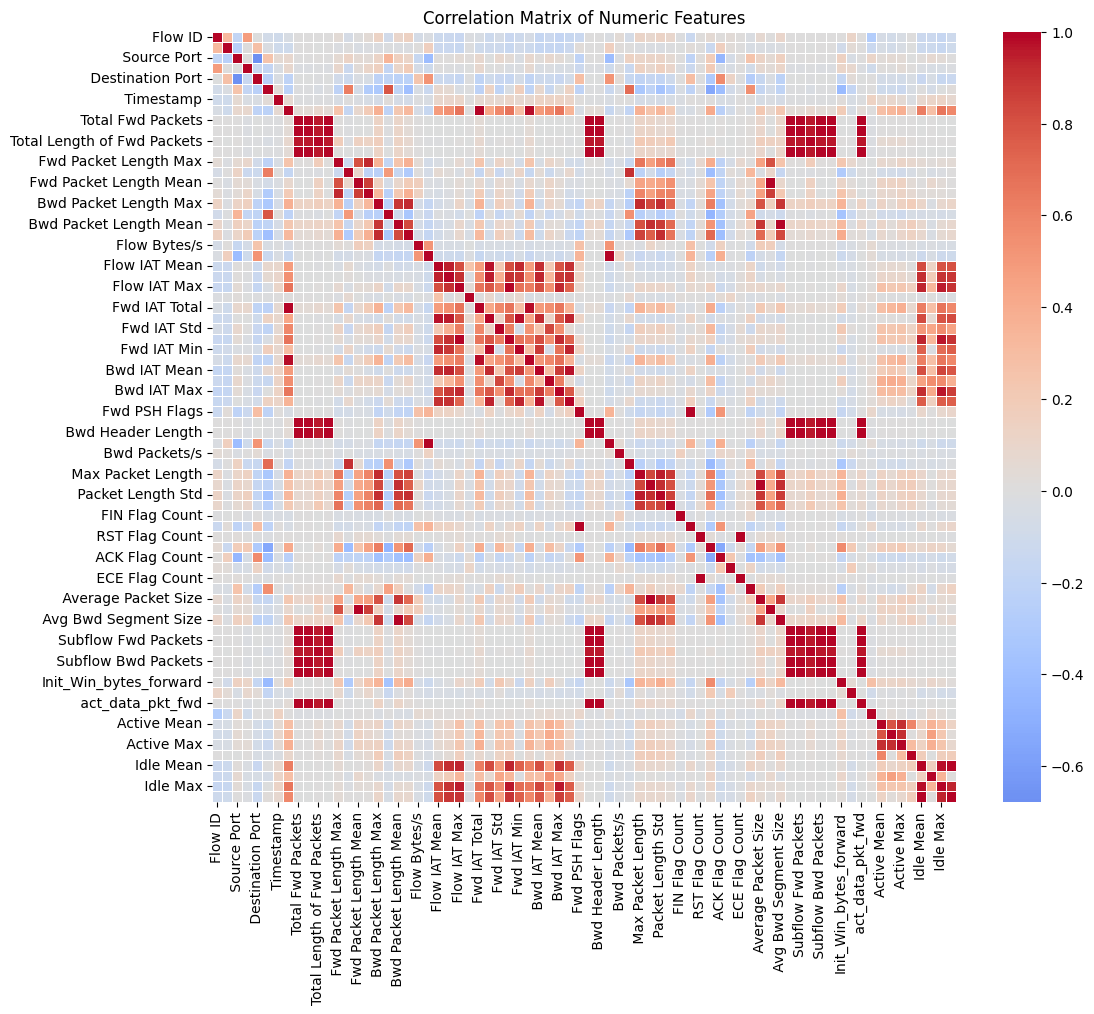

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# correlation matrix
corr_matrix = X_train.corr()

#  heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


### **4.2 Compare with PCA Components**
- PCA components indicate directions of maximum variance.
- Compare these with correlation matrix to detect redundant or less important features.
- Decide which original features to retain for modeling based on variance contribution and correlation.


In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_train)

print("Number of PCA components to retain 95% variance:", pca.n_components_)
print("Explained variance ratio of each component:\n", pca.explained_variance_ratio_)


Number of PCA components to retain 95% variance: 25
Explained variance ratio of each component:
 [0.20618591 0.16627294 0.13156367 0.06260743 0.04944104 0.04266789
 0.03248914 0.0277283  0.02540226 0.02274995 0.01789377 0.01750503
 0.01656634 0.01513922 0.01418978 0.01374335 0.01307391 0.01211155
 0.01157557 0.01099149 0.01063433 0.01017774 0.00865399 0.00688968
 0.00665477]


### **4.3 Select Top Features Using Random Forest**
- Use feature importances from the trained RF model.
- Compare top RF features with correlation and PCA analysis.
- Retain the most informative features for the next stage of training or model refinement.


In [37]:
#  RF model trained on original
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
top_features = importances.nlargest(10)




# Week-4 : Random Forest Model Training
### **1️. Train/Test Split**
1.1 Split the dataset into training and testing sets

1.2 Stratify the split to maintain class distribution.  
1.3 This ensures the model sees a representative distribution of attack and normal traffic.


In [38]:

from sklearn.model_selection import train_test_split


import pandas as pd

X_train = pd.read_csv('/content/drive/MyDrive/X_train_wednesday.csv')
X_test = pd.read_csv('/content/drive/MyDrive/X_test_wednesday.csv')
y_train = pd.read_csv('/content/drive/MyDrive/y_train_wednesday.csv')
y_test = pd.read_csv('/content/drive/MyDrive/y_test_wednesday.csv')

# convert to Series
y_train = y_train.iloc[:,0]
y_test = y_test.iloc[:,0]

print(" Training and testing sets loaded")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


 Training and testing sets loaded
X_train shape: (35000, 74)
X_test shape: (15000, 74)
y_train shape: (35000,)
y_test shape: (15000,)


### **2️. Model Training**

2.1 Train a **Random Forest Classifier** using `n_estimators=50` and `n_jobs=-1`.  
- `n_estimators=50` means the forest will consist of 50 decision trees.  
- `n_jobs=-1` uses all CPU cores for faster training.  

2.2 Fit the model on the **training dataset (`X_train`, `y_train`)**.  
- The model will learn patterns to distinguish normal and attack traffic.


In [39]:

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)

# Fit the model on training data
rf_model.fit(X_train, y_train)

print(" Random Forest model trained successfully")


 Random Forest model trained successfully


### **3.1 Predict on the Test Set**

- Use the trained Random Forest model to predict labels for the test data.  
- These predictions will be compared with the true labels to evaluate performance.


In [40]:
# Predict on test set
y_pred = rf_model.predict(X_test)
print(" Predictions completed")


 Predictions completed


### **3.2 Compute Accuracy, Precision, Recall, and F1-score**

- Evaluate the overall performance of the model using:
  - **Accuracy**: Proportion of correct predictions.
  - **Precision**: How many predicted attacks were actually attacks.
  - **Recall**: How many actual attacks were correctly predicted.
  - **F1-score**: Harmonic mean of precision and recall.


In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#  metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


### **3.3 Generate Classification Report**

- Provides detailed metrics (precision, recall, F1-score, support) for each class.  
- Useful to check performance for normal vs attack traffic specifically.


In [42]:
from sklearn.metrics import classification_report

#  classification report
report = classification_report(y_test, y_pred)
print(" Classification Report:\n")
print(report)


 Classification Report:

               precision    recall  f1-score   support

       BENIGN       1.00      1.00      1.00     14202
DoS slowloris       1.00      1.00      1.00       798

     accuracy                           1.00     15000
    macro avg       1.00      1.00      1.00     15000
 weighted avg       1.00      1.00      1.00     15000



### **4.1 Extract Feature Importance**

- Extract the feature importance scores from the trained Random Forest model.  
- These scores indicate how much each feature contributes to detecting attacks.  
- We'll use these scores to identify the most important features.


In [43]:
import pandas as pd

# feature importance from trained RF model
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importances.head(10)


,0
Flow ID,0.134274
Source IP,0.145919
Source Port,0.031570
Destination IP,0.025430
Destination Port,0.037478
Protocol,0.001110
Timestamp,0.041592
Flow Duration,0.003993
Total Fwd Packets,0.003380
Total Backward Packets,0.002094


### **4.2 Select Top 10 Features**

- Rank all features by importance.  
- Select the top 10 features for further analysis or visualization.  
- This helps focus on the most relevant features for intrusion detection.


In [44]:
# Select top 10 important features
top10_features = feature_importances.nlargest(10)
print("\nTop 10 Important Features:\n", top10_features)



Top 10 Important Features:
  Source IP                      0.145919
Flow ID                         0.134274
 Timestamp                      0.041592
 Destination Port               0.037478
 Bwd IAT Max                    0.035750
 Flow IAT Min                   0.034425
 Source Port                    0.031570
 min_seg_size_forward           0.030345
 Total Length of Bwd Packets    0.026289
 Destination IP                 0.025430
dtype: float64


### **4.3 Visualize Top Features**

- Use a horizontal bar chart to visualize the top 10 features.  
- Helps quickly understand which features have the most impact on the model.


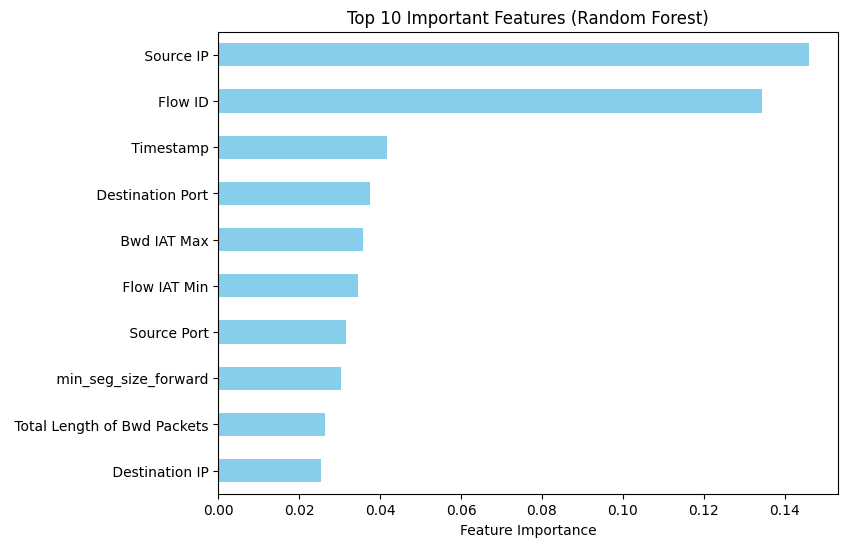

In [45]:
import matplotlib.pyplot as plt

# Plot top 10 features
plt.figure(figsize=(8,6))
top10_features.sort_values().plot(kind='barh', color='skyblue')
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Feature Importance")
plt.show()


### **5.1 Select Top RF Features**
- We use the previously calculated Random Forest feature importance scores.
- Choose the top N important features to reduce dimensionality and improve model efficiency.


In [46]:
import numpy as np

# Extract feature importance from trained model
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns

sorted_idx = np.argsort(feature_importances)[::-1]

N = 10
top_features = feature_names[sorted_idx][:N]

print(" Top Selected Features:")
print(top_features)


 Top Selected Features:
Index([' Source IP', 'Flow ID', ' Timestamp', ' Destination Port',
       ' Bwd IAT Max', ' Flow IAT Min', ' Source Port',
       ' min_seg_size_forward', ' Total Length of Bwd Packets',
       ' Destination IP'],
      dtype='object')


### **5.2 Retrain Model with Selected Top Features**
- Train a reduced Random Forest model using only selected top features.
- Compare performance to the full-model approach.


In [47]:
# Filter datasets with only top RF features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Retrain RF using top features
rf_refined = RandomForestClassifier(
    n_estimators=50,
    n_jobs=-1,
    random_state=42
)

rf_refined.fit(X_train_top, y_train.values.ravel())
y_pred_top = rf_refined.predict(X_test_top)

print(" Refined Model Training Completed")


 Refined Model Training Completed


### **5.3 Evaluate Performance After Refinement**
- Compare accuracy, precision, recall, and F1-score with the previous model.
- If performance improves or remains close, the model is more efficient.


In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc2 = accuracy_score(y_test, y_pred_top)
prec2 = precision_score(y_test, y_pred_top, average='weighted')
rec2 = recall_score(y_test, y_pred_top, average='weighted')
f1_2 = f1_score(y_test, y_pred_top, average='weighted')

print(" Refined Model Performance:")
print(f" Accuracy:  {acc2:.4f}")
print(f" Precision: {prec2:.4f}")
print(f" Recall:    {rec2:.4f}")
print(f" F1-score:  {f1_2:.4f}")


 Refined Model Performance:
 Accuracy:  1.0000
 Precision: 1.0000
 Recall:    1.0000
 F1-score:  1.0000


### **5.4 Compare Full Model vs Refined Model**
- Check whether reducing features improved or maintained performance.
- Helps decide final feature set for deployment.


In [50]:
comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Full Model': [accuracy, precision, recall, f1],
    'Refined Model': [acc2, prec2, rec2, f1_2]
})

print("\n Performance Comparison:\n")
print(comparison)



 Performance Comparison:

      Metric  Full Model  Refined Model
0   Accuracy         1.0            1.0
1  Precision         1.0            1.0
2     Recall         1.0            1.0
3   F1-score         1.0            1.0
